In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [27]:
vd_path = "./VD_dataset2/"

img = cv2.imread(os.path.join(vd_path, "0000_input.png")) # BGR image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # To RGB color space
target = cv2.imread(os.path.join(vd_path, "0000_target.png")) # BGR image
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
print(img)

[[[127 176 252]
  [127 176 252]
  [126 175 251]
  ...
  [125 174 250]
  [125 174 250]
  [124 173 249]]

 [[127 176 252]
  [125 174 250]
  [126 175 251]
  ...
  [125 174 250]
  [124 173 249]
  [125 174 250]]

 [[127 176 252]
  [126 175 251]
  [126 175 251]
  ...
  [123 172 248]
  [123 172 248]
  [124 173 249]]

 ...

 [[113 115 139]
  [121 119 141]
  [115 109 128]
  ...
  [138 119 114]
  [146 127 122]
  [149 130 128]]

 [[119 115 127]
  [138 130 140]
  [141 127 138]
  ...
  [115  96  97]
  [ 93  77  74]
  [ 81  61  57]]

 [[130 113 111]
  [177 158 153]
  [146 126 118]
  ...
  [131 113 107]
  [163 149 140]
  [126 111  99]]]


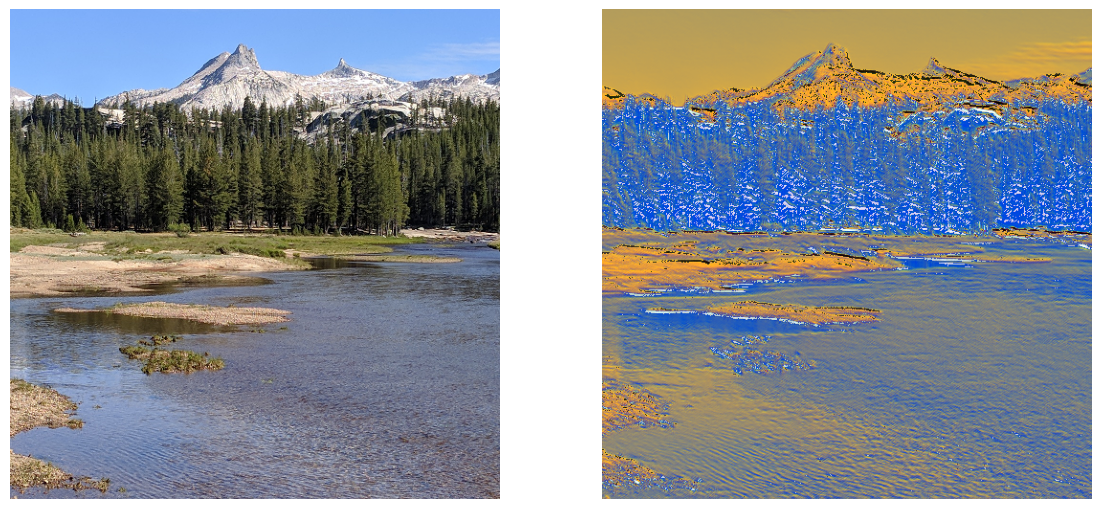

In [60]:
# plot images
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
ax2.imshow(target)

Seems like there is some color transformation function that can be learned from the image by human eye.
Some properties I found:
- Darker shades of color are converted to bluish colors
- Lighter shades of color are converted to yellowish colors
- Scenes with high contrast are colored either white or blue, not sure yet how this is formed
    - maybe some sliding window to spot these edges after transformation

In [54]:
r, g, b = cv2.split(img)
r, g, b = (r.ravel(), g.ravel(), b.ravel())
color = np.array((r, g, b),dtype=np.float32).T/255

Text(0.5, 0, 'B')

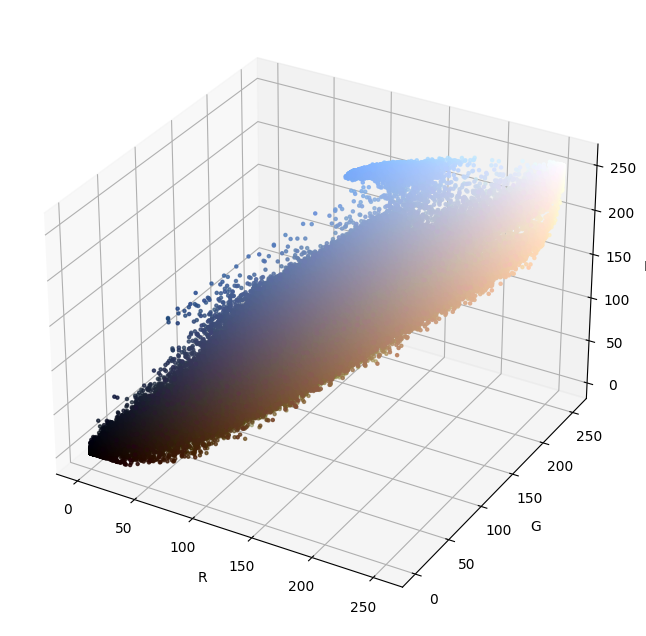

In [55]:
fig = plt.figure(figsize=(8,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(r, g, b, c=color, marker=".")
axis.set_xlabel("R")
axis.set_ylabel("G")
axis.set_zlabel("B")

Text(0.5, 0, 'B')

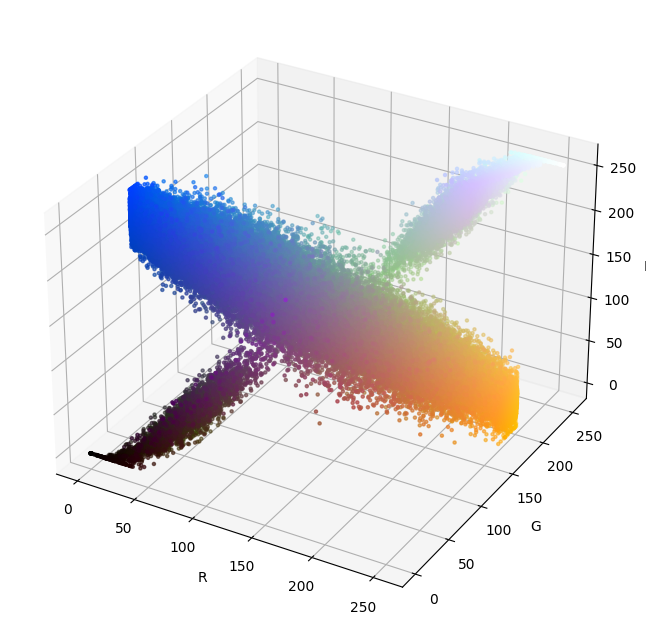

In [56]:
r, g, b = cv2.split(target)
r, g, b = (r.ravel(), g.ravel(), b.ravel())
color = np.array((r, g, b),dtype=np.float32).T/255
fig = plt.figure(figsize=(8,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(r, g, b, c=color, marker=".")
axis.set_xlabel("R")
axis.set_ylabel("G")
axis.set_zlabel("B")

In [58]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)
h, s, v = (h.ravel(), s.ravel(), v.ravel())

Text(0.5, 0, 'V')

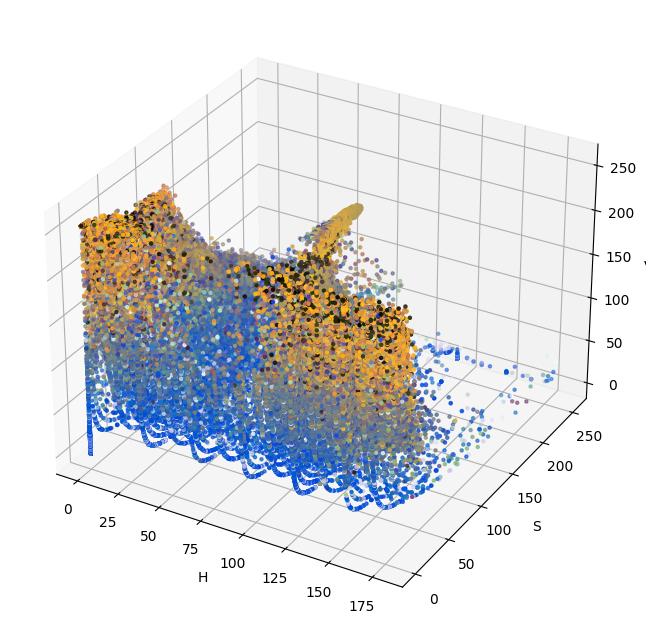

In [59]:
fig = plt.figure(figsize=(8,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h, s, v, c=color, marker=".")
axis.set_xlabel("H")
axis.set_ylabel("S")
axis.set_zlabel("V")

Text(0, 0.5, 'S')

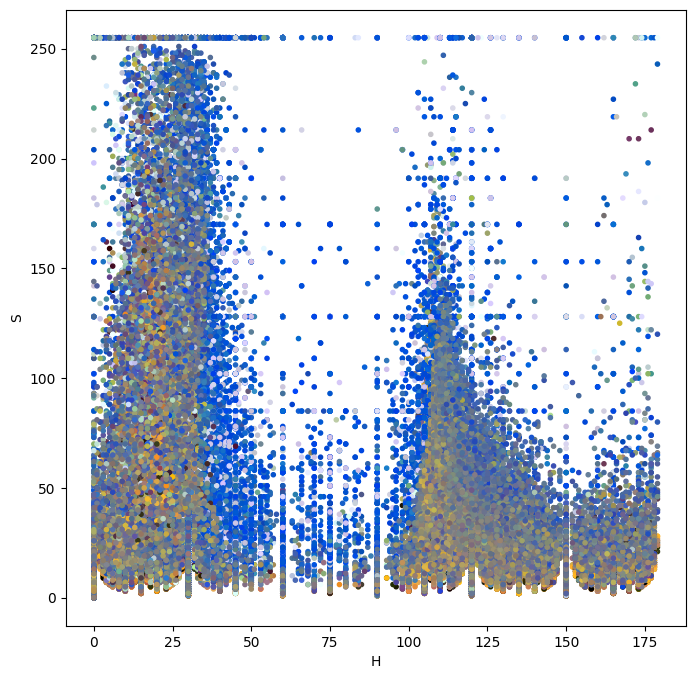

In [61]:
fig = plt.figure(figsize=(8,8))
plt.scatter(h, s, c=color, marker=".")
plt.xlabel("H")
plt.ylabel("S")

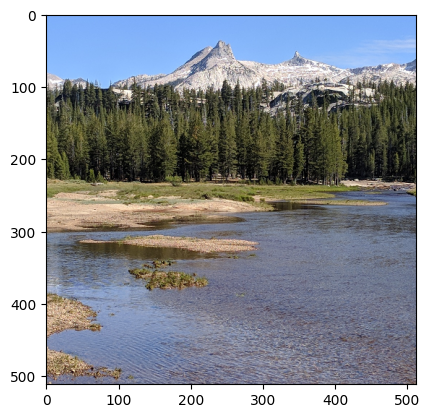

In [62]:
plt.imshow(img)

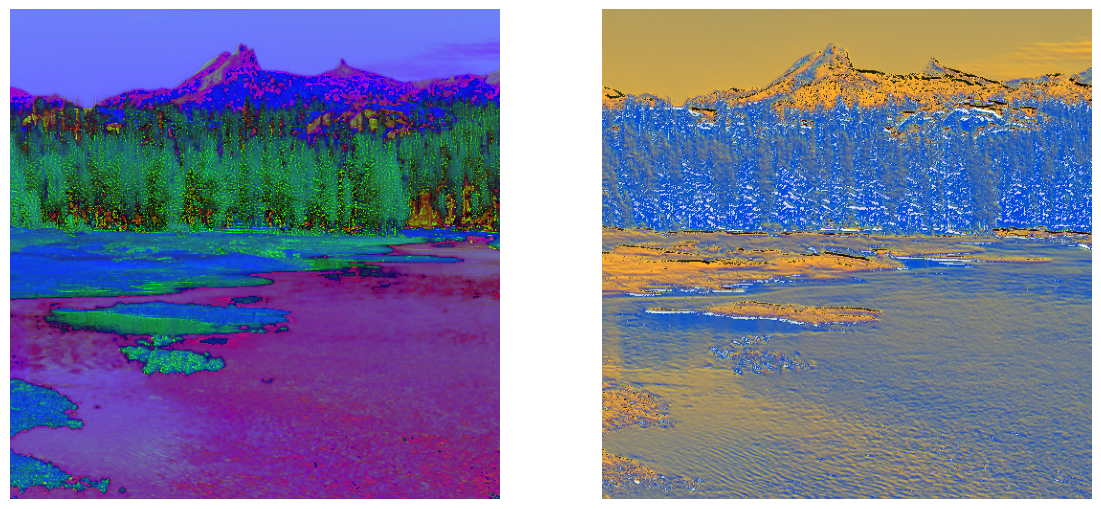

In [98]:
# plot images
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(hsv)
ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
ax2.imshow(target)

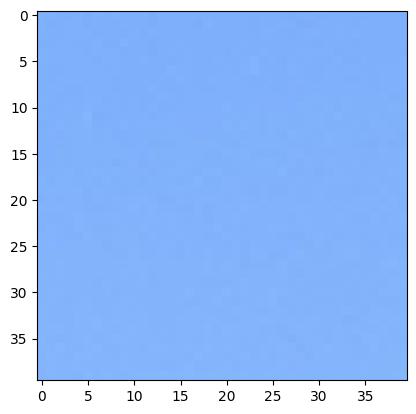

In [72]:
#plt.imshow(img[0:40])
subplot1 = img[0:40, 0:40]
plt.imshow(kalle[0:40])

In [75]:
subparts = []
512/50
n = 50
for i in range(0,11):
    subparts.append(img[i*n:(i+1)*n,i*n:(i+1)*n])

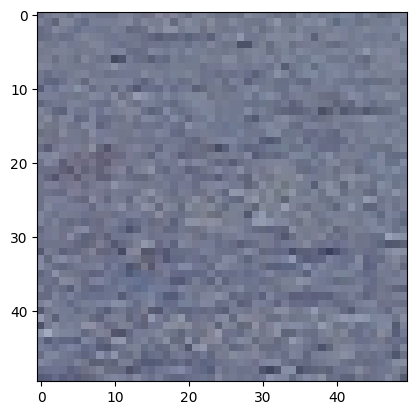

In [82]:
plt.imshow(subparts[7])

In [92]:
gray = cv2.imread(os.path.join(vd_path, "0000_input.png"))
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)

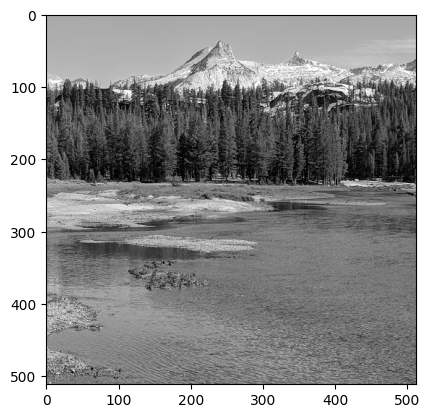

In [94]:
plt.imshow(gray, cmap = plt.cm.gray)

In [96]:
for row in gray:
    print(row)

[170 170 169 168 170 168 170 169 170 169 169 169 167 169 169 169 169 169
 169 168 169 169 169 168 169 169 168 167 168 169 168 168 169 169 168 168
 169 168 169 169 168 169 170 167 169 169 169 168 169 169 169 169 169 168
 169 167 167 168 169 169 167 167 168 169 168 167 168 168 168 169 169 168
 168 169 169 169 168 168 168 167 168 168 168 167 168 168 169 168 169 168
 168 169 168 168 168 167 169 166 167 168 167 167 167 167 168 168 167 166
 167 168 168 167 167 167 167 167 168 168 168 168 167 168 168 167 166 166
 168 168 167 168 167 166 166 167 166 167 166 165 168 167 167 167 168 168
 168 167 167 168 167 169 168 168 168 168 168 168 168 169 169 169 169 169
 168 168 168 167 169 167 169 166 170 170 170 170 169 170 168 171 171 170
 172 171 173 173 173 172 175 174 175 173 172 173 173 173 172 172 171 170
 169 172 170 169 172 170 173 172 172 173 171 170 172 171 171 171 172 172
 172 172 171 172 173 174 172 173 173 173 174 173 174 174 173 174 174 175
 175 176 174 174 174 174 173 173 173 175 174 173 17

[134 145 152 179 170 139 136 140 216 129 119 211 105  32 193 143  94 147
 169 101 195  84 119 108 204 120  74 119 235 141  65 110 108 107 113 103
 133  75 175  81 124 184 154 140 112 163 240 188 187 163 103 197 187 103
 123 196 192  52 181 114  97 146  90  19  24  82 128  78  78 115 111  90
 113 123 120 143 140 127  68  80  87  84  45 106  95 105 143 146 148 172
 169 151 122 126 147 136 128  77 127 159 124 138 136 129 144 149 137 133
 119 120 123 134 145 161 149 121 109 103 122 146 136 135 133 135 115 110
 101  85 113 138 147 156 142 123 110  92  95 109 138 143 130 104 114 111
 126 138 131 131 146 137 133 143 135 113  98  98 101  97 116 127 136 152
 153 159 139 104  79 104 116 128 138 136 138 138 137 143 161 126 126 133
 121 126 126 131 128  96 119 111 108 115 121 143 139 132 135 116 110 127
 124 102  95  96  98 118 132 138 143 112 122 127 130 132 135 142 117  93
  82  98 126 130 138 140 134 125 125  94  77  77  73  79  83  93 106 107
 118 143 138 144 124 116 119 115 113 110 105  90  8

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(np.arange(512),hist2_rgb.ravel())
plt.title('RGB histogram (8 x 8 x 8 bins)')